In [1]:
import csv
import requests
import bs4
import pandas as pd
import re
import requests
import json
import numpy as np
from pandas.io.json import json_normalize

# Twitter

In [2]:
import json
import csv
import tweepy
import re

In [3]:
consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_token_secret = 'xxx'

In [4]:
#create authentication for accessing Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#initialize Tweepy API
api = tweepy.API(auth)

get trending topics for region

Singapore: 23424948
Malaysia: 56013632
Vietnam: 23424984
Japan: 90036018
Worldwide: 1


https://codebeautify.org/jsonviewer/f83352

In [5]:
woeid = 23424948

In [6]:
trends1 = api.trends_place(woeid)

In [7]:
trendtable = json_normalize(json_normalize(trends1)['trends'][0])

In [8]:
trendtable.nlargest(5,['tweet_volume'])

,name,promoted_content,query,tweet_volume,url
33,Biden,None,Biden,1494238.0,http://twitter.com/search?q=Biden
32,kamala harris,None,%22kamala+harris%22,1032512.0,http://twitter.com/search?q=%22kamala+harris%22
5,Israel,None,Israel,892603.0,http://twitter.com/search?q=Israel
7,Soribada,None,Soribada,828778.0,http://twitter.com/search?q=Soribada
48,#CBIForSSR,None,%23CBIForSSR,681607.0,http://twitter.com/search?q=%23CBIForSSR


get tweets for search_words

In [9]:
search_words = ""

In [10]:
for name in trendtable.nlargest(5,['tweet_volume'])["name"]:
    search_words = search_words + " OR " + name

In [11]:
search_words = search_words + " -filter:retweets"
print(search_words)

 OR Biden OR kamala harris OR Israel OR Soribada OR #CBIForSSR -filter:retweets


In [12]:
#search_words = "#coronavirus -filter:retweets"
#date_since = "2020-02-01"

In [13]:
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",tweet_mode='extended').items(500)

In [14]:
jsonstrfortweets = json.dumps([tweet._json for tweet in tweets])

In [15]:
latest500tweetsfromtrendsjson = json.loads(jsonstrfortweets)

In [16]:
tweetstable = json_normalize(latest500tweetsfromtrendsjson)

In [17]:
tweetstable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 162 entries, contributors to user.verified
dtypes: bool(18), float64(23), int64(9), object(112)
memory usage: 571.4+ KB


In [18]:
print(tweetstable['full_text'])

0      I really hate Kamala Harris, and I don’t even ...
1      The fake news is trying to make Americans thin...
2      As Joe Biden officially introduces Kamara Harr...
3      @ProudSocialist @JoeBiden The DNC is so out of...
4      @gtconway3d Trump said Biden and Harris will a...
5      @21royalstreet Why do people not understand th...
6      @stucam7771 The “questions” are warmed-over bi...
7      Y’all need to stop. If Martin Luther King wasn...
8      @LubnaOc In my opinion it’s a tactic to halt I...
9      The 14th Amendment makes it clear: “All person...
10     Fact checkers rush to proclaim Kamala Harris a...
11     @DrAmbardar @DNCWarRoom Please attend the onli...
12     "A thought police White House essentially run ...
13     "She was told time and time again in her life,...
14     #KamalaHarris or #MarjorieGreene ?\nTwo VERY d...
15     @fluffydandruff @joelpollak @JoeBiden Am I the...
16     I would never vote for Biden or Harris.  But m...
17     @markpoloncarz Mark and 

Get top 3 favourite and top retweeted tweets

In [19]:
tweetstable['retweet_count'] = tweetstable['retweet_count'].astype(int)
tweetstable['favorite_count'] = tweetstable['favorite_count'].astype(int)

In [20]:
toptweets = tweetstable.nlargest(10,['retweet_count','favorite_count'])['full_text']

In [21]:
toptweetsjson = toptweets.to_json()

In [22]:
print(toptweetsjson)

{"148":"As for BLM supporters talking about Jamaica   she even  stereotyped   Black Jamaicans as pot-smoking people   She is a phoney as the MSM and the @DNC     \n\nhttps:\/\/t.co\/pwkg6jgFkw","402":"Prof M D Nalapat was one of the first to predict a Biden-Harris team as early as in 2019. Now that his prediction has come true, what does it mean for the India-US relations. Have Sanders' Pak sympathizers jumped ship to the Biden-Harris bandwagon? https:\/\/t.co\/QqlreAHIKz","454":"Prof @MD_Nalapat was one of the first to predict a Biden-Harris team as early as in 2019. Now that his prediction has come true, what does it mean for the India-US relations. Have Sanders' Pak sympathizers jumped ship to the Biden-Harris bandwagon? https:\/\/t.co\/eriFKToRpA","156":"You can\u2019t support Palestine and support Kamala Harris at the same time. Not unless political ideology is not what you base your support on. Normalize supporting politicians based on what they believe in and not because they\u2

2 API
- get latest 500 tweets - latest500tweetsfromtrendsjson
- get top 5 retweeted and favourited tweets - toptweetsjson

# Sentiment Analysis

In [23]:
tweetstabletext = pd.DataFrame(tweetstable['full_text'],columns = ['full_text'])

In [24]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Iris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Iris\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Iris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Iris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # remove words with 'corona', 'coronavirus','wuhan', 'virus', 'coron', 'cor', 'wuhanvirus'
    #and t != 'corona' and t != 'wuhan' and t != 'virus' and t != 'coron' and t != 'cor' and t != 'wuhanvirus'
    ###text = [t for t in text if 'corona' not in t and 'wuhan' not in t and 'virus' not in t]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
tweetstabletext["full_text_clean"] = tweetstabletext["full_text"].apply(lambda x: clean_text(x))

In [26]:
tweetstabletext.head()

,full_text,full_text_clean
0,"I really hate Kamala Harris, and I don’t even ...",really hate kamala harris don’t even know it’s...
1,The fake news is trying to make Americans thin...,fake news try make american think high amount ...
2,As Joe Biden officially introduces Kamara Harr...,joe biden officially introduce kamara harris r...
3,@ProudSocialist @JoeBiden The DNC is so out of...,proudsocialist joebiden dnc touch doubt nomina...
4,@gtconway3d Trump said Biden and Harris will a...,trump say biden harris abolish animal abolish ...


In [27]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
tweetstabletext["sentiments"] = tweetstabletext["full_text"].apply(lambda x: sid.polarity_scores(x))

In [28]:
tweetstabletext.head()

,full_text,full_text_clean,sentiments
0,"I really hate Kamala Harris, and I don’t even ...",really hate kamala harris don’t even know it’s...,"{'neg': 0.199, 'neu': 0.801, 'pos': 0.0, 'comp..."
1,The fake news is trying to make Americans thin...,fake news try make american think high amount ...,"{'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'comp..."
2,As Joe Biden officially introduces Kamara Harr...,joe biden officially introduce kamara harris r...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp..."
3,@ProudSocialist @JoeBiden The DNC is so out of...,proudsocialist joebiden dnc touch doubt nomina...,"{'neg': 0.048, 'neu': 0.9, 'pos': 0.052, 'comp..."
4,@gtconway3d Trump said Biden and Harris will a...,trump say biden harris abolish animal abolish ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [29]:
tweetstabletext = pd.concat([tweetstabletext.drop(['sentiments'], axis=1), tweetstabletext['sentiments'].apply(pd.Series)], axis=1)

In [30]:
tweetstabletext.head()

,full_text,full_text_clean,neg,neu,pos,compound
0,"I really hate Kamala Harris, and I don’t even ...",really hate kamala harris don’t even know it’s...,0.199,0.801,0.000,-0.8978
1,The fake news is trying to make Americans thin...,fake news try make american think high amount ...,0.111,0.889,0.000,-0.6935
2,As Joe Biden officially introduces Kamara Harr...,joe biden officially introduce kamara harris r...,0.000,0.843,0.157,0.8244
3,@ProudSocialist @JoeBiden The DNC is so out of...,proudsocialist joebiden dnc touch doubt nomina...,0.048,0.900,0.052,0.0516
4,@gtconway3d Trump said Biden and Harris will a...,trump say biden harris abolish animal abolish ...,0.000,1.000,0.000,0.0000


In [31]:
# add number of characters column
tweetstabletext["nb_chars"] = tweetstabletext["full_text"].apply(lambda x: len(x))

# add number of words column
tweetstabletext["nb_words"] = tweetstabletext["full_text"].apply(lambda x: len(x.split(" ")))

In [32]:
tweetstabletext.head()

,full_text,full_text_clean,neg,neu,pos,compound,nb_chars,nb_words
0,"I really hate Kamala Harris, and I don’t even ...",really hate kamala harris don’t even know it’s...,0.199,0.801,0.000,-0.8978,270,56
1,The fake news is trying to make Americans thin...,fake news try make american think high amount ...,0.111,0.889,0.000,-0.6935,278,50
2,As Joe Biden officially introduces Kamara Harr...,joe biden officially introduce kamara harris r...,0.000,0.843,0.157,0.8244,273,45
3,@ProudSocialist @JoeBiden The DNC is so out of...,proudsocialist joebiden dnc touch doubt nomina...,0.048,0.900,0.052,0.0516,284,52
4,@gtconway3d Trump said Biden and Harris will a...,trump say biden harris abolish animal abolish ...,0.000,1.000,0.000,0.0000,111,18


In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

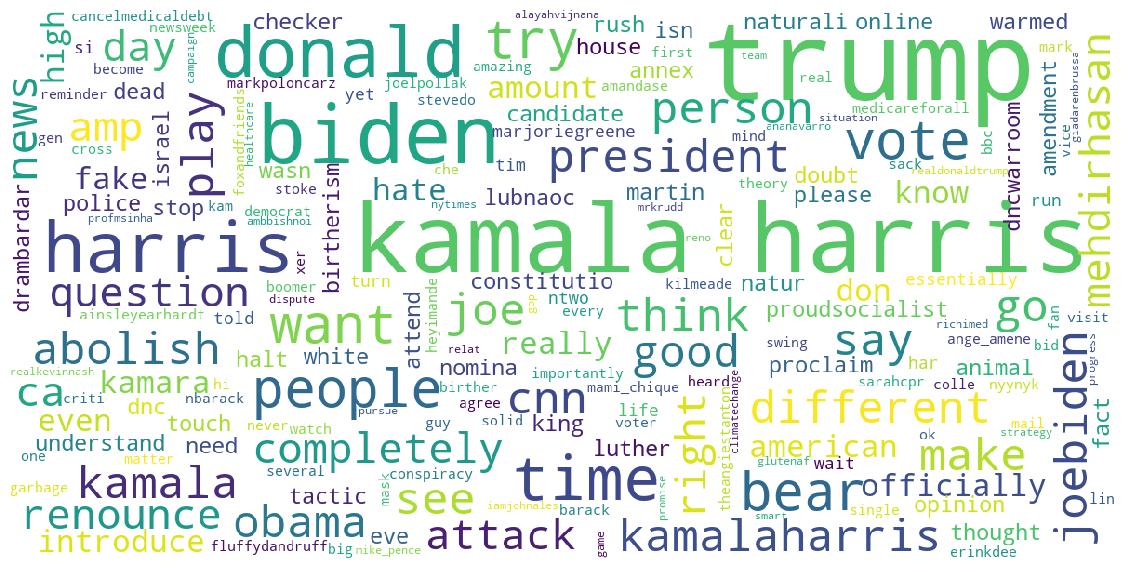

In [34]:
# print wordcloud
show_wordcloud(tweetstabletext["full_text_clean"])

In [35]:
print(tweetstabletext['compound'].sum())

-26.5


In [36]:
overallsentimentscore = json.dumps(tweetstabletext['compound'].sum())

In [37]:
overallsentimentscore

'-26.5'

1 API
 - get overall sentiment - overallsentimentscore

### Archived Code

tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)

for tweet in tweets:
    print(tweet.created_at)
    print(tweet.text)
    if len(tweet.entities['urls']) is not 0:
        print(tweet.entities['urls'][0]['url'])
    if len(tweet.entities['user_mentions']) is not 0:
        print(tweet.entities['user_mentions'][0]['screen_name'])
        print(tweet.entities['user_mentions'][0]['name'])
    print("---------------")